In [2]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import timeit
import cv2
import scipy
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_laplace
from scipy.ndimage import rank_filter 
import skimage
from skimage.feature import peak_local_max, blob_dog, blob
import time

In [3]:
def show_all_circles(image, cx, cy, rad, IMG_NAME, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.savefig(IMG_NAME)
    plt.show()


In [4]:
def read_image(IMG_NAME):
    # YOUR CODE HERE
    gray=np.asarray(Image.open(IMG_NAME).convert('L'))/255
    return gray

In [5]:
def increase_filter_image_iteratiion(IMG,sigma_initial, n, multi_factor):
    
    h, w = IMG.shape

    scale_space = np.empty((h,w,n)) # [h,w] - dimensions of image, n - number of levels in scale space
    scale_fact = 1
    r = []
    for i in range(n):
        sigma=sigma_initial*multi_factor**i
        r.append(np.sqrt(2)*sigma)
        scale_space[:,:,i] = sigma**2*gaussian_laplace(IMG,sigma)

    return scale_space, np.array(r) 

In [6]:
def downsample_image_iteratiion(IMG,sigma_initial, n, multi_factor):
    
    h, w = IMG.shape
    sigma = sigma_initial
    scale_space = np.empty((h,w,n)) # [h,w] - dimensions of image, n - number of levels in scale space
    r = []
    orig_img = IMG
    k = multi_factor
    for i in range(n):
        down_scale_factor=1/multi_factor**i
        r.append(np.sqrt(2)*sigma/down_scale_factor)
        h_new = int(IMG.shape[0]*down_scale_factor)
        w_new = int(IMG.shape[1]*down_scale_factor)
        down_scale_img = skimage.transform.resize(IMG,(h_new,w_new),mode='reflect',anti_aliasing=True)
        filter_img = gaussian_laplace(down_scale_img,sigma)
        scale_space[:,:,i] = skimage.transform.resize(filter_img**2,(h,w),mode='reflect',anti_aliasing=True)
    return scale_space, np.array(r) 

In [7]:
def nonmaximum_suppression(img_stack,thres_hold):
    
    non_max_return = np.zeros([img_stack.shape[0],img_stack.shape[1],img_stack.shape[2]])
    peak_index= peak_local_max(scale_space)
    non_max_return[peak_index[:,0],peak_index[:,1],peak_index[:,2]] = img_stack[peak_index[:,0],peak_index[:,1],peak_index[:,2]]
    thred = np.where(non_max_return>thres_hold,non_max_return,0)
    position = np.nonzero(thred)
    
    
    return position
  

Time elapse =  1.2248668670654297


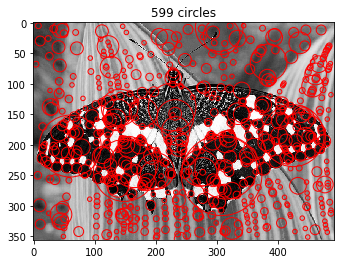

In [8]:
# Increase Filter size
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'butterfly.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.0015
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = increase_filter_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space, thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+ 'UpSample_'+IMG_NAME)

Time elapse =  0.45403385162353516


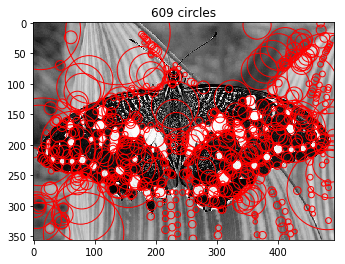

In [9]:
# Downsample images
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'butterfly.jpg'
out_folder = 'output/'


initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.00075
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = downsample_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space,thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+'DownSample_'+IMG_NAME)

Time elapse =  2.1719589233398438


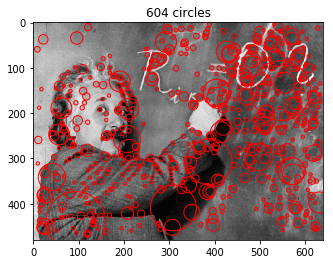

In [11]:
# Increase Filter size
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'einstein.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.025
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = increase_filter_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space, thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+ 'UpSample_'+IMG_NAME)

Time elapse =  0.7379341125488281


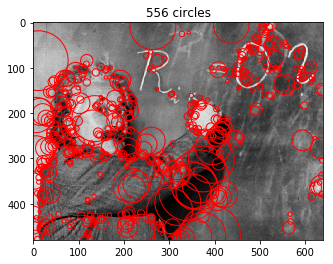

In [12]:
# Downsample images
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'einstein.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.0004
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = downsample_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space,thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+'DownSample_'+IMG_NAME)

Time elapse =  0.8343658447265625


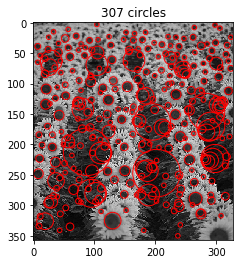

In [13]:
# Increase Filter size
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'sunflowers.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.025
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = increase_filter_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space, thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+ 'UpSample_'+IMG_NAME)

Time elapse =  0.2984631061553955


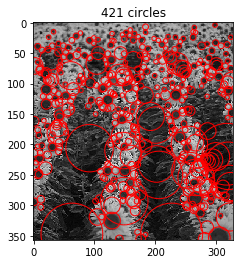

In [17]:
# Downsample images
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'sunflowers.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.0008
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = downsample_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space,thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+'DownSample_'+IMG_NAME)

Time elapse =  1.2124390602111816


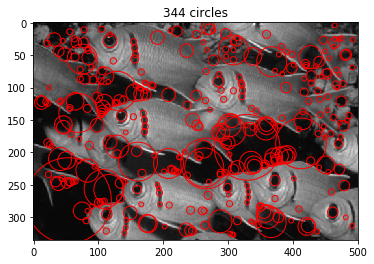

In [18]:
# Increase Filter size
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'fishes.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.025
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = increase_filter_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space, thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+ 'UpSample_'+IMG_NAME)

Time elapse =  0.41802000999450684


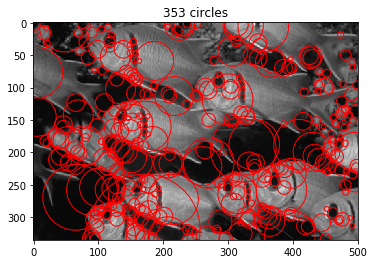

In [20]:
# Downsample images
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'fishes.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.0005
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = downsample_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space,thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+'DownSample_'+IMG_NAME)

Time elapse =  4.31630802154541


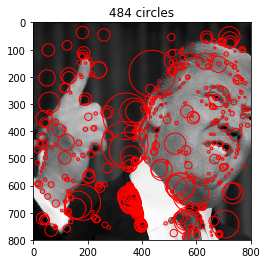

In [37]:
# Increase Filter size
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'a1.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.025
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = increase_filter_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space, thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+ 'UpSample_'+IMG_NAME)

Time elapse =  1.2506718635559082


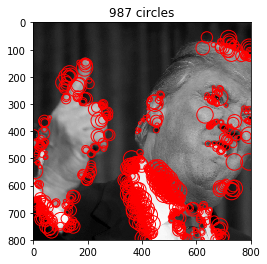

In [44]:
# Downsample images
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'a1.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.2
thred = 0.0005
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = downsample_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space,thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+'DownSample_'+IMG_NAME)

Time elapse =  2.3197691440582275


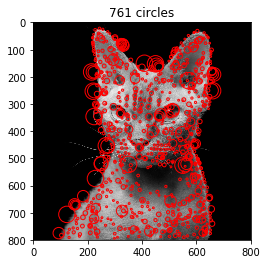

In [47]:
# Increase Filter size
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'b1.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.2
thred = 0.01
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = increase_filter_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space, thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+ 'UpSample_'+IMG_NAME)

Time elapse =  1.3327178955078125


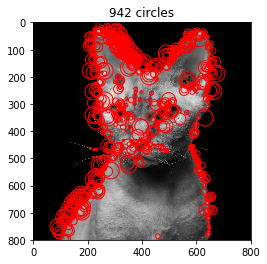

In [50]:
# Downsample images
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'b1.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.2
thred = 0.0005
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = downsample_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space,thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+'DownSample_'+IMG_NAME)

Time elapse =  2.118086814880371


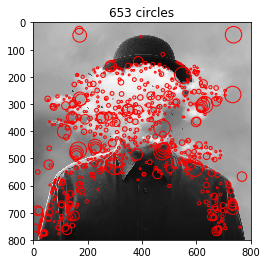

In [55]:
# Increase Filter size
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'c1.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.2
thred = 0.01
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = increase_filter_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space, thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+ 'UpSample_'+IMG_NAME)

Time elapse =  1.1998817920684814


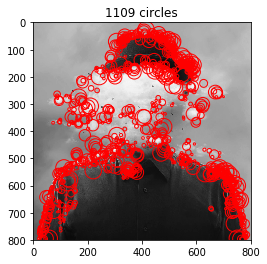

In [59]:
# Downsample images
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'c1.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.2
thred = 0.0001
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = downsample_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space,thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+'DownSample_'+IMG_NAME)

Time elapse =  4.744199752807617


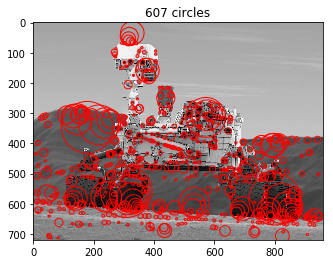

In [261]:
# Increase Filter size
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'd1.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.025
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = increase_filter_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space, thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+ 'UpSample_'+IMG_NAME)

Time elapse =  1.5782489776611328


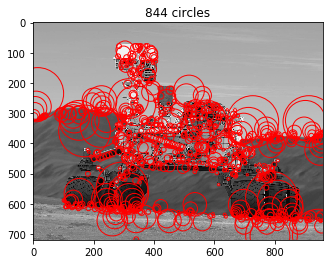

In [61]:
# Downsample images
IMG_FOLDER = 'part2_images/'
IMG_NAME = 'd1.jpg'
out_folder = 'output/'
initial_sigma = 2
num_iter = 15
factor = 1.3
thred = 0.0005
img = read_image(IMG_FOLDER + IMG_NAME)
start_time = time.time()
scale_space ,r  = downsample_image_iteratiion(img,initial_sigma,num_iter,factor)
position= nonmaximum_suppression(scale_space,thred)
end_time = time.time()
cx = position[1]
cy = position[0]
rad = r[position[2]]
print('Time elapse = ', end_time-start_time)
show_all_circles(img, cx, cy, rad,out_folder+'DownSample_'+IMG_NAME)